### 5. Feladatsor

bevezető a diffegyenletek numerikus megoldásába

#### Kezdetiérték-probléma

Az $f$ vektormezővel adott differenciálegyenletet tekintsük a $[\tau_0, \tau_1]$ intervallumon, $x(\tau_0) = x_0$ kezdetiértékkel.

$$
    \begin{cases}
        \dot x(t) &= f(t, x(t)), \quad \quad t \in [\tau_0,\tau_1]\\
        x(\tau_0) &= x_0
    \end{cases}
$$

#### Dahlquist-féle tesztegyenlet

$$
\begin{align}
     \dot x = \lambda x
\end{align}
$$

ahol $\lambda \in \mathbb{C}$ paraméter.

#### 1. Feladat

Oldjuk meg ezt a feladatot a $[0,1]$ intervallumon $\lambda \in \{-1, 0, 1\}$ paraméterek mellett, $x(0) = 1$ kezdetiértékkel a programcsomagunk beépített függvényei segítségével (pl. `ode45`). Ábrázoljuk a kapott megoldásokat.

In [1]:
function dXdt = f_test_eq(_, X)
    dXdt = (-1) * X;
end

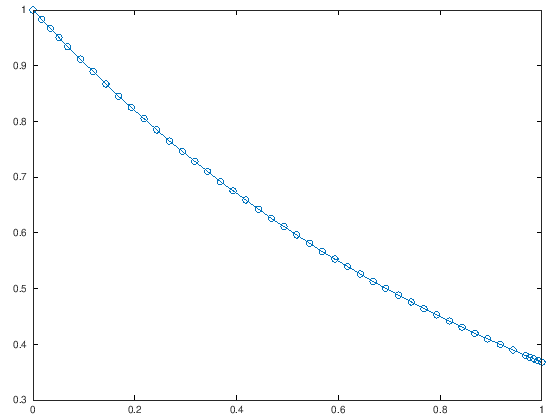

In [2]:
ode45(@f_test_eq, [0, 1], 1)

#### Lotka-Volterra modell <a href="http://www.tankonyvtar.hu/hu/tartalom/tamop425/0038_informatika_Geda_Gabor-Modellezes_es_szimulacio_az_oktatasban/ch04s03.html">(zsákmány-ragadozó modell, 1926)</a>

$$
\begin{cases}
     \dot x(t)&=\phantom{-}\alpha x(t)-\beta x(t)y(t), \\
     \dot y(t)&=-\gamma y(t)+\delta x(t)y(t),
\end{cases}
$$

ahol $0 \leq t \leq T$ az időt, $x(t)$ a zsákmány és $y(t)$ a ragadozók számát, 
$\alpha, \beta,\gamma,\delta \in\mathbb{R}^+$ konstansok pedig az ezek közötti interakciót modellezi.

Egy lehetséges paraméterezés a következő:

In [3]:
[alfa, beta, gamma, delta] = {.6, 3e-5, .6, 1.5e-5}{:};
[_, T] = {0, 50}{:};
[x0, y0] = {90000, 2000}{:};

#### 2. feladat

Oldjuk meg a fenti paraméterezésű kezdetiérték-feladatot a programcsomagunk beépített függvényei segítségével (pl. `ode45`). Ábrázoljuk a kapott megoldásokat.

In [4]:
function dXdt = f_lotka_volterra(t, X)
    [alfa, beta, gamma, delta] = {.6, 3e-5, .6, 1.5e-5}{:};

    dXdt = [alfa*X(1) - beta*X(1)*X(2), - gamma*X(2) + delta*X(1)*X(2) ];
end

In [5]:
[ts, ys] = ode45(@f_lotka_volterra, [0, 50], [90000, 2000]);

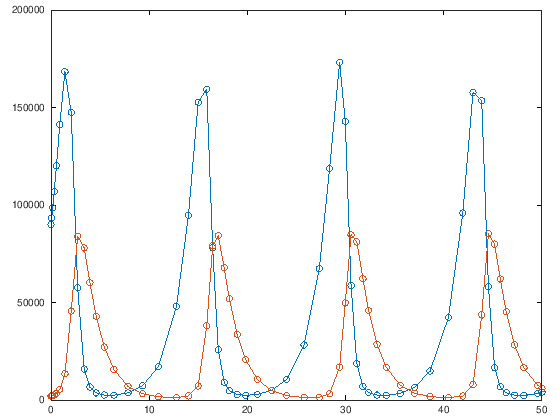

In [6]:
plot(ts, ys, 'o-')

A megoldást ábrázoljuk a fázis-síkon is.

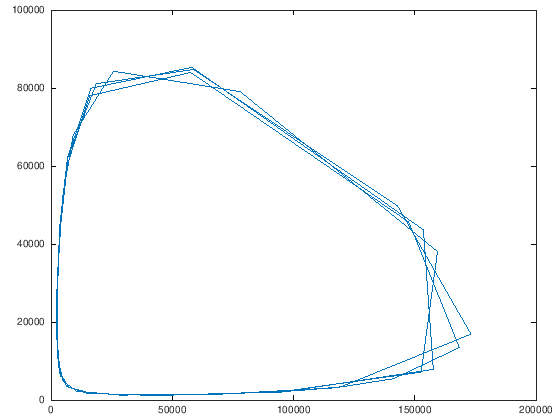

In [7]:
plot(ys(:, 1), ys(:, 2))

Igényeljünk pontosabb megoldást, majd ezt is ábrázoljuk.

In [8]:
[ts, ys] = ode45(@f_lotka_volterra, [0, 50], [90000, 2000], odeset('AbsTol', 1e-10, 'RelTol', 1e-10));

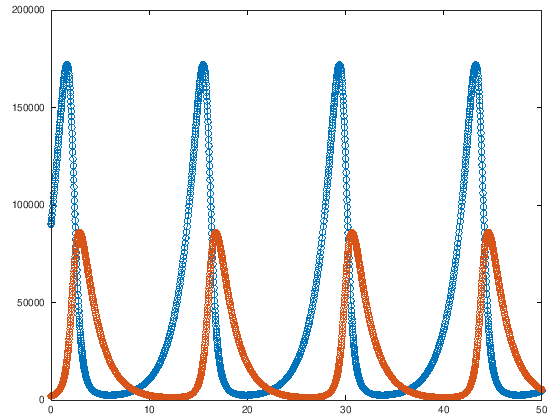

In [9]:
plot(ts, ys, 'o-')

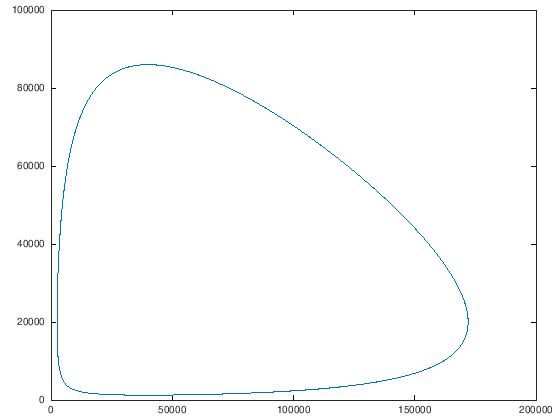

In [10]:
plot(ys(:, 1), ys(:, 2))

#### 3. feladat

Implementáljuk az Explicit-Euler módszert:
$$
\begin{cases}
k_1 &= f(t_n, y_n)\\
y_{n+1} &= y_n + h_n k_1,
\end{cases}
$$ majd próbáljuk is ki a korábbi feladatokon. 

Bemeneti paraméterek legyenek a következők
* a diffegyenletet leíró vektormező,
* időpontok, ahol a numerikus megoldás érdekel minket,
* kezdetiérték.

In [11]:
function [ts, ys] = explicit_euler(f, ts, y0)
    ys = zeros(numel(ts), numel(y0));
    ys(1, :) = y0;
    
    for k=1:(numel(ts) - 1)
        h = ts(k+1) - ts(k);
        ys(k+1, :) = ys(k, :) + h * f(ts(k), ys(k, :));
    end
end

In [12]:
[ts, ys] = explicit_euler(@(t, x)(x), 0:.1:.4, 1)

ts =

    0.00000    0.10000    0.20000    0.30000    0.40000

ys =

   1.0000
   1.1000
   1.2100
   1.3310
   1.4641



In [13]:
[ts, ys] = explicit_euler(@f_lotka_volterra, 0:.05:20, [90000, 2000]);

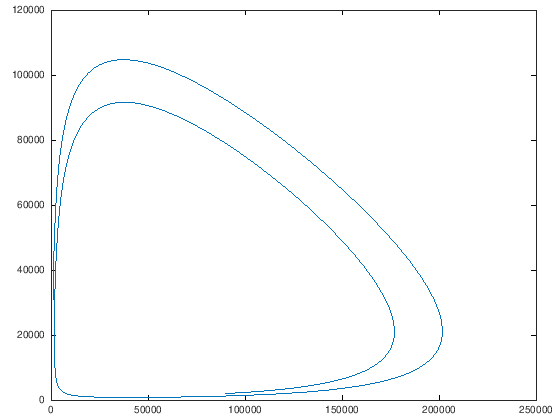

In [14]:
plot(ys(:, 1), ys(:, 2))

#### 4. feladat

Implementáljuk "a Runge-Kutta módszert":

\begin{cases}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + \frac{1}{2} h_n, y_n + h_n \frac{1}{2} k_1) \\
k_3 &= f(t_n + \frac{1}{2} h_n, y_n + h_n \frac{1}{2} k_2) \\
k_4 &= f(t_n + h_n, y_n + h_n k_3) \\
\\
y_{n+1} &= y_n + h_n \frac{1}{6} \left( k_1 + 2k_2 + 2k_3 + k_4\right),
\end{cases}
majd próbáljuk is ki a korábbi feladatokon.

Bemeneti paraméterek legyenek a következők:
* a diffegyenletet leíró vektormező,
* időpontok, ahol a numerikus megoldás érdekel minket,
* kezdetiérték.

In [5]:
function [ts, ys] = runge_kutta(f, ts, y0)
    ys = zeros(numel(ts), numel(y0));
    ys(1, :) = y0;
    for n=1: numel(ts)-1
        h = ts(n+1) - ts(n);
        k(1, :) = f(ts(n), ys(n, :));
        k(2, :) = f(ts(n) + h/2, ys(n, :) + h*k(1, :)/2);
        k(3, :) = f(ts(n) + h/2, ys(n, :) + h*k(2, :)/2);
        k(4, :) = f(ts(n) + h, ys(n, :) + h*k(3, :));
        ys(n+1, :) = ys(n, :) + h*(k(1, :) + k(2, :)*2 + k(3, :)*2 + k(4, :))/6;
    end
end

In [17]:
[ts, ys] = runge_kutta(@f_lotka_volterra, 0:.05:20, [90000, 2000]);

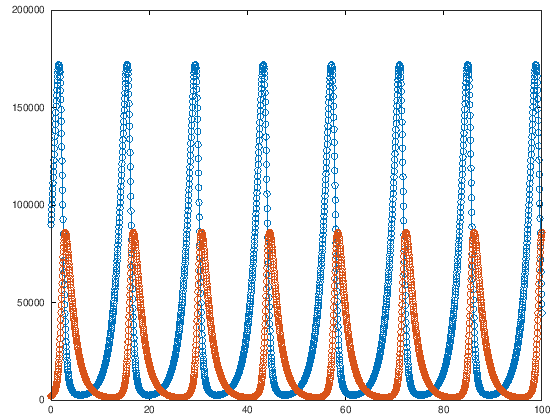

In [7]:
plot(ts, ys, 'o-')

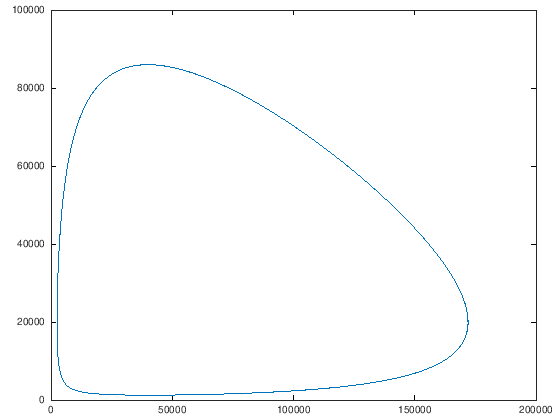

In [18]:
plot(ys(:, 1), ys(:, 2))